<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_3_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.402410,48.718213,0.002972,127.123595,127.121459,0.002136
1,0.0,1.0,66.883850,76.377784,-0.001209,153.260425,153.261539,-0.001114
2,0.0,2.0,38.675313,25.392386,0.000528,74.068227,74.069010,-0.000783
3,0.0,3.0,45.855745,23.922897,-0.008396,79.770247,79.780074,-0.009828
4,0.0,4.0,85.362105,28.786942,-0.005982,124.143065,124.150711,-0.007646
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,26.641910,75.481607,-0.000278,112.123240,112.123863,-0.000623
119996,999.0,116.0,25.232420,83.231330,-0.000384,118.463366,118.464101,-0.000735
119997,999.0,117.0,79.420751,74.090439,-0.000037,163.511152,163.511071,0.000082
119998,999.0,118.0,43.365051,78.947635,0.000225,132.312910,132.312880,0.000030


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.402410  48.718213  0.002972  127.123595  127.121459  0.002136
      1.0    66.883850  76.377784 -0.001209  153.260425  153.261539 -0.001114
      2.0    38.675313  25.392386  0.000528   74.068227   74.069010 -0.000783
      3.0    45.855745  23.922897 -0.008396   79.770247   79.780074 -0.009828
      4.0    85.362105  28.786942 -0.005982  124.143065  124.150711 -0.007646
...                ...        ...       ...         ...         ...       ...
999.0 115.0  26.641910  75.481607 -0.000278  112.123240  112.123863 -0.000623
      116.0  25.232420  83.231330 -0.000384  118.463366  118.464101 -0.000735
      117.0  79.420751  74.090439 -0.000037  163.511152  163.511071  0.000082
      118.0  43.365051  78.947635  0.000225  132.312910  132.312880  0.000030
      119.0  49.500605  92.297457  0.000235  151.798297  151.798191  0.000106

[120000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.402410  48.718213  0.002972  127.123595  127.121459  0.002136
      1.0    66.883850  76.377784 -0.001209  153.260425  153.261539 -0.001114
      2.0    38.675313  25.392386  0.000528   74.068227   74.069010 -0.000783
      3.0    45.855745  23.922897 -0.008396   79.770247   79.780074 -0.009828
      4.0    85.362105  28.786942 -0.005982  124.143065  124.150711 -0.007646
...                ...        ...       ...         ...         ...       ...
999.0 115.0  26.641910  75.481607 -0.000278  112.123240  112.123863 -0.000623
      116.0  25.232420  83.231330 -0.000384  118.463366  118.464101 -0.000735
      117.0  79.420751  74.090439 -0.000037  163.511152  163.511071  0.000082
      118.0  43.365051  78.947635  0.000225  132.312910  132.312880  0.000030
      119.0  49.500605  92.297457  0.000235  151.798297  151.798191  0.000106

[120000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,68.402410,48.718213,0.002972,127.123595,127.121459,0.002136
1,0.0,1.0,66.883850,76.377784,-0.001209,153.260425,153.261539,-0.001114
2,0.0,2.0,38.675313,25.392386,0.000528,74.068227,74.069010,-0.000783
3,0.0,3.0,45.855745,23.922897,-0.008396,79.770247,79.780074,-0.009828
4,0.0,4.0,85.362105,28.786942,-0.005982,124.143065,124.150711,-0.007646
...,...,...,...,...,...,...,...,...
119995,999.0,115.0,26.641910,75.481607,-0.000278,112.123240,112.123863,-0.000623
119996,999.0,116.0,25.232420,83.231330,-0.000384,118.463366,118.464101,-0.000735
119997,999.0,117.0,79.420751,74.090439,-0.000037,163.511152,163.511071,0.000082
119998,999.0,118.0,43.365051,78.947635,0.000225,132.312910,132.312880,0.000030


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    68.402410  48.718213  0.002972  127.123595  127.121459  0.002136
      1.0    66.883850  76.377784 -0.001209  153.260425  153.261539 -0.001114
      2.0    38.675313  25.392386  0.000528   74.068227   74.069010 -0.000783
      3.0    45.855745  23.922897 -0.008396   79.770247   79.780074 -0.009828
      4.0    85.362105  28.786942 -0.005982  124.143065  124.150711 -0.007646
...                ...        ...       ...         ...         ...       ...
999.0 115.0  26.641910  75.481607 -0.000278  112.123240  112.123863 -0.000623
      116.0  25.232420  83.231330 -0.000384  118.463366  118.464101 -0.000735
      117.0  79.420751  74.090439 -0.000037  163.511152  163.511071  0.000082
      118.0  43.365051  78.947635  0.000225  132.312910  132.312880  0.000030
      119.0  49.500605  92.297457  0.000235  151.798297  151.798191  0.000106

[120000 rows x 6 columns]

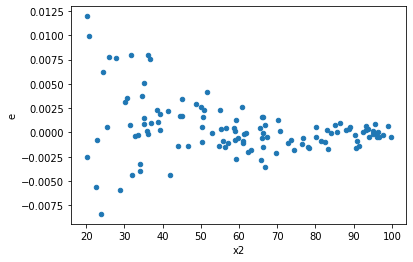

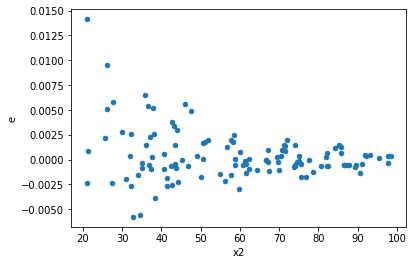

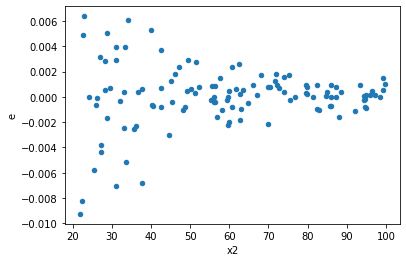

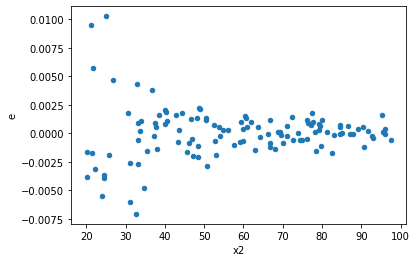

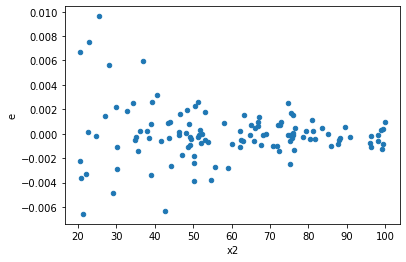

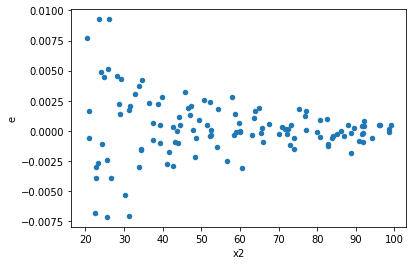

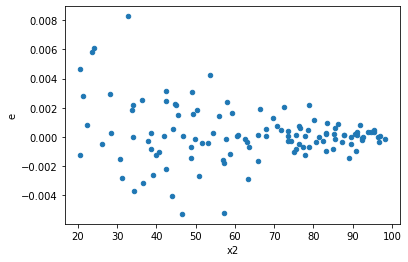

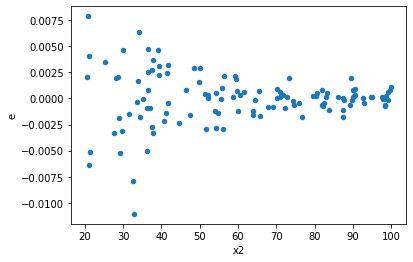

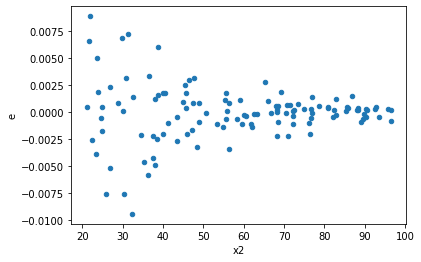

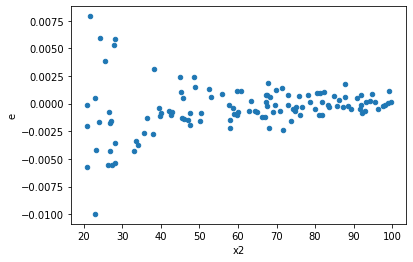

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
2.0,49.0,67.0,0.00016608451072771415,0.0005324076909244706,3.3894798107696765e-06,7.946383446633889e-06,2.3444256612431156,0.0012474145712875195,0.9993762927143562,0.0006237072856437598,Reject005=0 : Heteroscedasticity
3.0,55.0,61.0,4.569969488043373e-05,0.0005655390623167082,8.309035432806132e-07,9.271132169126365e-06,11.157892205540051,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject005=0 : Heteroscedasticity
6.0,46.0,70.0,5.405419511859185e-05,0.00032988455593256443,1.1750911982302577e-06,4.712636513322349e-06,4.010443206807948,1.8312672467324376e-07,0.9999999084366377,9.156336233662188e-08,Reject005=0 : Heteroscedasticity
7.0,64.0,52.0,0.00010396224819075998,0.0005394864820346814,1.6244101279806247e-06,1.0374740039128489e-05,6.386773795867539,1.6201995300946237e-10,0.99999999991899,8.100997650473118e-11,Reject005=0 : Heteroscedasticity
11.0,63.0,53.0,0.00020099338990383416,0.000734844021486175,3.190371268314828e-06,1.3864981537475e-05,4.345883400836468,1.7620906178628104e-07,0.9999999118954691,8.810453089314052e-08,Reject005=0 : Heteroscedasticity
12.0,48.0,68.0,6.685284789417561e-05,0.0007619785865940322,1.392767664461992e-06,1.1205567449912239e-05,8.04553963725228,2.6201263381153694e-14,0.9999999999999869,1.3100631690576847e-14,Reject005=0 : Heteroscedasticity
13.0,57.0,59.0,0.00013153338376298922,0.0009305656402825235,2.3076032239120915e-06,1.577229898783938e-05,6.834926743212172,7.183142969324763e-12,0.9999999999964084,3.5915714846623814e-12,Reject005=0 : Heteroscedasticity
14.0,60.0,56.0,9.301713907750108e-05,0.0004759613526932359,1.5502856512916846e-06,8.49930986952207e-06,5.482415361608048,1.368022584102846e-09,0.9999999993159887,6.84011292051423e-10,Reject005=0 : Heteroscedasticity
16.0,55.0,61.0,0.00010705963751255156,0.0008695223126843442,1.9465388638645737e-06,1.4254464142366298e-05,7.322979472429389,9.725553695716371e-13,0.9999999999995137,4.862776847858186e-13,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,67.0,49.0,0.0008079910087429355,0.00010159570772973653,1.2059567294670679e-05,2.0733817904027863e-06,0.17192837352622492,7.756866922501003e-11,Reject005=0 : Heteroscedasticity
1.0,57.0,59.0,0.0005956499038067349,0.0001221314192922867,1.0449998312398859e-05,2.0700240558014696e-06,0.1980884583823711,5.8627756325043506e-09,Reject005=0 : Heteroscedasticity
2.0,49.0,67.0,0.00016608451072771415,0.0005324076909244706,3.3894798107696765e-06,7.946383446633889e-06,2.3444256612431156,0.0012474145712875195,Reject005=0 : Heteroscedasticity
3.0,55.0,61.0,4.569969488043373e-05,0.0005655390623167082,8.309035432806132e-07,9.271132169126365e-06,11.157892205540051,2.220446049250313e-16,Reject005=0 : Heteroscedasticity
4.0,80.0,36.0,0.0005383666939473776,4.8878384677805914e-05,6.7295836743422206e-06,1.357732907716831e-06,0.2017558549562937,2.6819815912700723e-09,Reject005=0 : Heteroscedasticity
5.0,51.0,65.0,0.0006792065134682012,8.58466248950087e-05,1.33177747738863e-05,1.320717306077057e-06,0.09916951806894497,1.7995790963827796e-14,Reject005=0 : Heteroscedasticity
6.0,46.0,70.0,5.405419511859185e-05,0.00032988455593256443,1.1750911982302577e-06,4.712636513322349e-06,4.010443206807948,1.8312672467324376e-07,Reject005=0 : Heteroscedasticity
7.0,64.0,52.0,0.00010396224819075998,0.0005394864820346814,1.6244101279806247e-06,1.0374740039128489e-05,6.386773795867539,1.6201995300946237e-10,Reject005=0 : Heteroscedasticity
8.0,62.0,54.0,0.0006298720960807504,0.0001857359098506854,1.0159227356141135e-05,3.439553886123804e-06,0.33856451534620235,4.978533074150517e-05,Reject005=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    983
Reject005=1 : Homoscedasticity       17
Name: Result_test, dtype: int64